In [2]:
import pandas as pd
import numpy as np
import time

dataset_process = pd.read_csv("Base de dados_2_PCA.csv", delimiter=';')


len(dataset_process.columns)

16

In [3]:
display(dataset_process)

,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d
0,171.64,449.72,102.23,41.19,13.48,36.65,10.39,5.79,172.33,461.25,100.84,43.83,1.86,8.31,1.27,3.64
1,166.01,437.82,101.38,39.62,15.91,47.27,9.80,4.71,170.83,454.92,101.36,43.66,3.20,11.81,0.54,3.86
2,165.02,455.03,98.69,42.45,14.88,39.88,8.41,5.27,169.27,452.12,100.87,42.84,3.83,8.93,1.33,3.52
3,167.47,430.98,101.78,39.30,15.25,55.78,9.42,4.15,168.87,446.85,100.97,40.94,3.91,12.24,1.38,1.43
4,168.92,440.11,98.12,38.21,13.50,58.61,8.67,3.77,167.81,442.73,100.44,40.15,2.60,9.61,1.89,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,172.08,434.49,100.52,37.93,14.07,42.00,9.27,4.27,170.72,447.15,100.14,39.51,2.26,14.81,1.43,1.10
7185,174.04,455.28,100.68,40.72,15.31,48.36,8.23,4.75,171.06,451.71,100.64,39.46,2.66,12.50,0.91,1.03
7186,183.57,461.62,99.72,41.28,19.68,61.83,7.93,5.28,173.38,453.45,100.41,39.78,6.26,13.29,0.97,1.32
7187,194.75,457.27,99.58,40.43,11.45,36.93,7.62,4.92,178.28,451.14,100.46,40.04,11.00,10.71,0.90,1.29


In [4]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
XPCA = pca.fit_transform(dataset_process)

In [5]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(XPCA)

# Percentage of variance explained for each components
print(pca_viewer.explained_variance_ratio_)

[0.70307897 0.19642411]


In [6]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

display (principal_components_df)

,principal component 1,principal component 2
0,-11.001838,-10.138161
1,3.576911,-10.193448
2,-11.538517,-1.409215
3,13.332087,-8.439301
4,6.450094,-2.742246
...,...,...
7184,10.079966,-5.402769
7185,-9.780569,1.209335
7186,-14.652508,4.054376
7187,-12.716552,1.436108


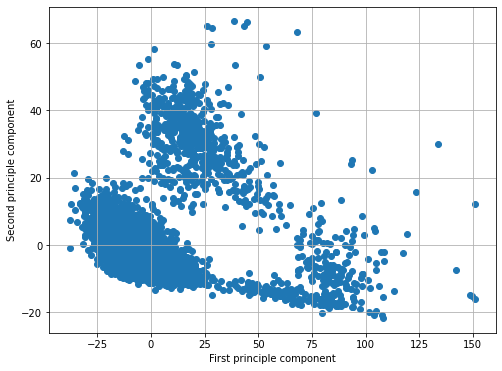

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(XPCA[:,0],XPCA[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.grid()

In [8]:
principal_components_df.to_excel("PCA_banco_2.xlsx")

In [10]:
import seaborn as sns
dataset_process.mean()

voltmean_24h         170.749203
rotatemean_24h       446.438574
pressuremean_24h     100.722900
vibrationmean_24h     40.409222
voltsd_24h            14.925033
rotatesd_24h          49.792127
pressuresd_24h        10.034288
vibrationsd_24h        5.012170
voltmean_5d          170.731348
rotatemean_5d        446.511940
pressuremean_5d      100.724603
vibrationmean_5d      40.393030
voltsd_5d              3.633016
rotatesd_5d           12.769324
pressuresd_5d          2.783340
vibrationsd_5d         1.381093
dtype: float64

In [11]:
dataset_process.std()

voltmean_24h          4.711121
rotatemean_24h       18.136662
pressuremean_24h      4.444405
vibrationmean_24h     2.119746
voltsd_24h            2.256407
rotatesd_24h          7.760689
pressuresd_24h        1.688611
vibrationsd_24h       0.811501
voltmean_5d           2.611246
rotatemean_5d        10.711939
pressuremean_5d       2.696894
vibrationmean_5d      1.245203
voltsd_5d             2.372100
rotatesd_5d           9.899813
pressuresd_5d         2.816056
vibrationsd_5d        1.240284
dtype: float64

In [12]:
z = (dataset_process-dataset_process.mean())/dataset_process.std()
z.mean()

voltmean_24h        -3.365775e-14
rotatemean_24h       2.092235e-13
pressuremean_24h    -2.385446e-14
vibrationmean_24h   -2.693620e-14
voltsd_24h           1.791430e-18
rotatesd_24h         7.533540e-15
pressuresd_24h      -1.607138e-14
vibrationsd_24h     -8.652165e-15
voltmean_5d         -8.585791e-14
rotatemean_5d        6.874675e-14
pressuremean_5d     -7.465389e-15
vibrationmean_5d     4.388351e-14
voltsd_5d           -6.854318e-15
rotatesd_5d          3.047295e-15
pressuresd_5d       -3.034157e-15
vibrationsd_5d       3.593002e-15
dtype: float64

In [13]:
z.std()

voltmean_24h         1.0
rotatemean_24h       1.0
pressuremean_24h     1.0
vibrationmean_24h    1.0
voltsd_24h           1.0
rotatesd_24h         1.0
pressuresd_24h       1.0
vibrationsd_24h      1.0
voltmean_5d          1.0
rotatemean_5d        1.0
pressuremean_5d      1.0
vibrationmean_5d     1.0
voltsd_5d            1.0
rotatesd_5d          1.0
pressuresd_5d        1.0
vibrationsd_5d       1.0
dtype: float64

In [14]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
ZPCA = pca.fit_transform(z)

In [15]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(ZPCA)

# Percentage of variance explained for each components
print(pca_viewer.explained_variance_ratio_)

[0.34055633 0.33979109]


In [16]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])

display (principal_components_df)

,principal component 1,principal component 2
0,1.620206,2.836273
1,0.988283,2.097243
2,0.693608,2.677868
3,-0.475364,-0.254849
4,-1.381431,-0.423865
...,...,...
7184,-1.238952,-0.761555
7185,-0.823301,0.151602
7186,0.133513,0.974139
7187,0.893660,1.467202


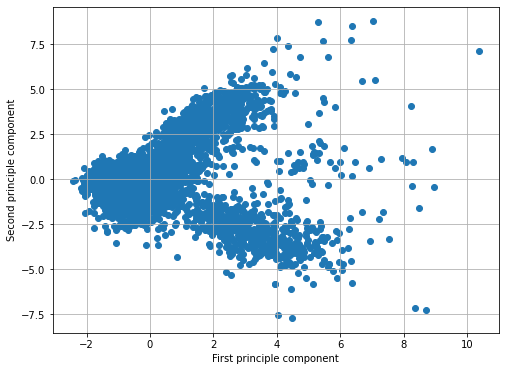

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(ZPCA[:,0],ZPCA[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.grid()

In [18]:
principal_components_df.to_excel("PCA_banco_2_normalizado.xlsx")